In [1]:
import netCDF4
import numpy
from matplotlib import pyplot
from matplotlib.path import Path 

from geophys_utils import get_grid_edge_points

#import dask
#import dask.array

from concave_hull import concaveHull
from concave_hull import plotPoints, plotPath

In [2]:
nc_file = 'http://dapds00.nci.org.au/thredds/catalog/rr2/airborne_geophysics/http/SA/P1162/magnetics/grid/mSA1162/catalog.html?dataset=rr2-Airborne-http/SA/P1162/magnetics/grid/mSA1162/mSA1162.nc'
local_file = 'mNSW1027.nc'

In [3]:
ds = netCDF4.Dataset(local_file)

list(ds.variables)

In [5]:
mag_tmi_anomaly = ds.variables['mag_tmi_anomaly']
lat = ds.variables['lat']
lon = ds.variables['lon']

mask = mag_tmi_anomaly[:].mask

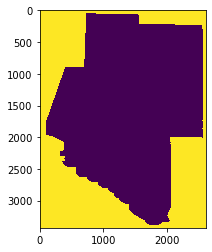

In [7]:
pyplot.imshow(mask)

In [8]:
points = numpy.array(get_grid_edge_points(mag_tmi_anomaly, (lat, lon), mag_tmi_anomaly._FillValue))

In [9]:
points.shape

(12376, 2)

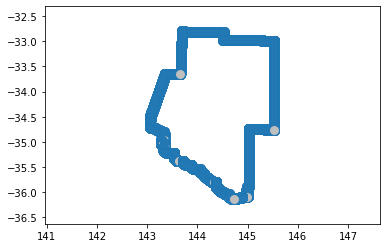

In [11]:
plotPoints(points)

In [14]:
%%time
hull = concaveHull(points, 3)

k 3
CPU times: user 5min 45s, sys: 87.4 ms, total: 5min 46s
Wall time: 5min 46s


In [19]:
hull.shape

(10502, 2)

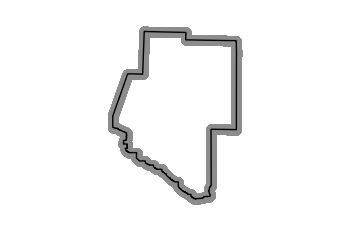

In [18]:
plotPath(points, hull)